In [1]:
# Temel kütüphanelerin import edilmesi
import numpy as np  # Sayısal hesaplamalar için
import pandas as pd  # Veri işleme ve analiz için
import warnings  # Uyarı mesajlarını yönetmek için
import matplotlib.pyplot as plt  # Grafik çizimi için
import seaborn as sns  # İleri düzey istatistiksel görselleştirme için
import tensorflow as tf  # Derin öğrenme modelleri için
from tensorflow.keras import regularizers  # Keras düzenleyici (regularization) fonksiyonları
import xgboost as xgb  # XGBoost modeli için

# Makine öğrenmesi için çeşitli kütüphaneler
from sklearn.decomposition import PCA  # Boyut indirgeme (Principal Component Analysis)
from sklearn import tree  # Karar ağaçları modelleri
from sklearn.naive_bayes import GaussianNB  # Naive Bayes sınıflandırıcı
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon
from sklearn.neighbors import KNeighborsClassifier  # KNN sınıflandırıcı
from sklearn.tree import DecisionTreeClassifier  # Karar ağacı sınıflandırıcı
from sklearn.preprocessing import RobustScaler  # Özellik ölçekleme
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Rastgele orman modelleri
from sklearn.model_selection import train_test_split  # Veri setini eğitim/test olarak ayırma
from sklearn import svm  # Destek vektör makineleri
from sklearn import metrics  # Model değerlendirme metrikleri

# Pandas ayarları
pd.set_option("display.max_columns", None)  # DataFrame gösteriminde tüm sütunların görünmesini sağlar

# Uyarıları kapatma
warnings.filterwarnings("ignore")  # Gereksiz uyarı mesajlarını görmezden gelir

In [2]:
# Eğitim veri setini CSV dosyasından yükleme
data_train = pd.read_csv(r"C:\Users\sulen\OneDrive\Masaüstü\Python ile Veri Analizi Atölyesi\KDDTrain+.txt")  
# Veri setinin ilk 5 satırını görüntüleme
data_train.head()  

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Elimizdeki veri seti, ağ trafiğine ait bağlantı bilgilerini içermektedir. Her satırda kullanılan protokol türü (örneğin tcp, udp, http), bağlantının durumu (SF, REJ gibi), çeşitli sayısal özellikler ve bu trafiğin normal mi yoksa bir saldırı türü mü olduğu bilgisi yer almaktadır. Örneğin bazı satırlar “normal” olarak etiketlenirken, bazıları “neptune” gibi saldırı türleriyle işaretlenmiştir. Bu sayede veri seti, normal ve zararlı trafiği ayırt ederek siber saldırı tespitinde kullanılabilecek bir kaynak sağlamaktadır.

In [3]:
# Veri setine sütun isimlerini atama
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'sre_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_ratel',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'outcome', 'level'
]

# Veri setine yeni sütun isimlerini atama
data_train.columns = columns  

# Güncellenmiş veri setinin ilk 5 satırını görüntüleme
data_train.head()  

,duration,protocol_type,service,flag,sre_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_ratel,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# Veri setinin genel bilgilerini görüntüleme
data_train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   sre_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

Veri seti, siber saldırı tespiti amacıyla kullanılabilecek; sayısal ve kategorik özellikler içeren, eksiksiz ve geniş bir eğitim seti sunmaktadır.

In [5]:
# Sayısal sütunların temel istatistiklerini görüntüleme
# .describe() ile count, mean, std, min, 25%, 50%, 75%, max değerleri hesaplanır
# style.background_gradient ile değerleri mavi tonlarda görselleştirir
# set_properties ile tablo yazı tipini "Segoe UI" olarak ayarlar
data_train.describe().style.background_gradient(cmap="Blues").set_properties(**{"font-family":"Segoe UI"})

,duration,sre_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_ratel,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


Veri setinin sayısal sütunları incelendiğinde, çoğunlukla düşük değerlere yoğunlaşan ancak bazı sütunlarda oldukça yüksek uç değerler içeren sağa çarpık bir dağılım gözlemlenmektedir. Özellikle duration, dst_bytes ve sre_bytes gibi sütunlarda standart sapmalar çok yüksek olup, veri setinde geniş bir değer aralığı mevcuttur. Bazı sütunlar çoğunlukla sıfır değerler içerirken, maksimum değerler veri setinde uç bağlantıları göstermektedir. Bu durum, modelleme öncesinde ölçekleme veya dönüşüm gibi ön işleme adımlarının önemini ortaya koymaktadır ve özelliklerin saldırı tespitinde farklı etkilerinin olabileceğini göstermektedir.

In [6]:
# 'outcome' sütununda normal olarak işaretlenmiş değerleri "normal" olarak bırakma
data_train.loc[data_train["outcome"] == "normal", "outcome"] = "normal"

# 'outcome' sütununda normal olan değerleri "attack" olarak değiştirme (muhtemelen amaç tüm diğer değerleri saldırı olarak etiketlemek)
data_train.loc[data_train["outcome"] != "normal", "outcome"] = "attack"

In [7]:
# Veri setindeki kategorik sütunların pasta grafiklerini çizen fonksiyon
def pie_plot(df, cols_list, rows, cols):
    """
    df        : Veri çerçevesi (DataFrame)
    cols_list : Pasta grafiği çizilecek sütunların listesi
    rows      : Grafiklerin kaç satırda yer alacağı
    cols      : Grafiklerin kaç sütunda yer alacağı
    """
    # Çoklu alt grafikler (subplots) oluşturma
    fig, axes = plt.subplots(rows, cols)
    
    # Her bir sütun için pasta grafiği çizme
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(
            ax=ax,             # Alt grafik ekseni
            kind="pie",        # Pasta grafiği
            figsize=(15, 15),  # Grafik boyutu
            fontsize=10,       # Yazı boyutu
            autopct="%1.0f%%"  # Dilim yüzdelerini göster
        )
        ax.set_title(str(col), fontsize=12)  # Her grafiğe başlık ekleme
    
    # Tüm grafikleri gösterme
    plt.show()

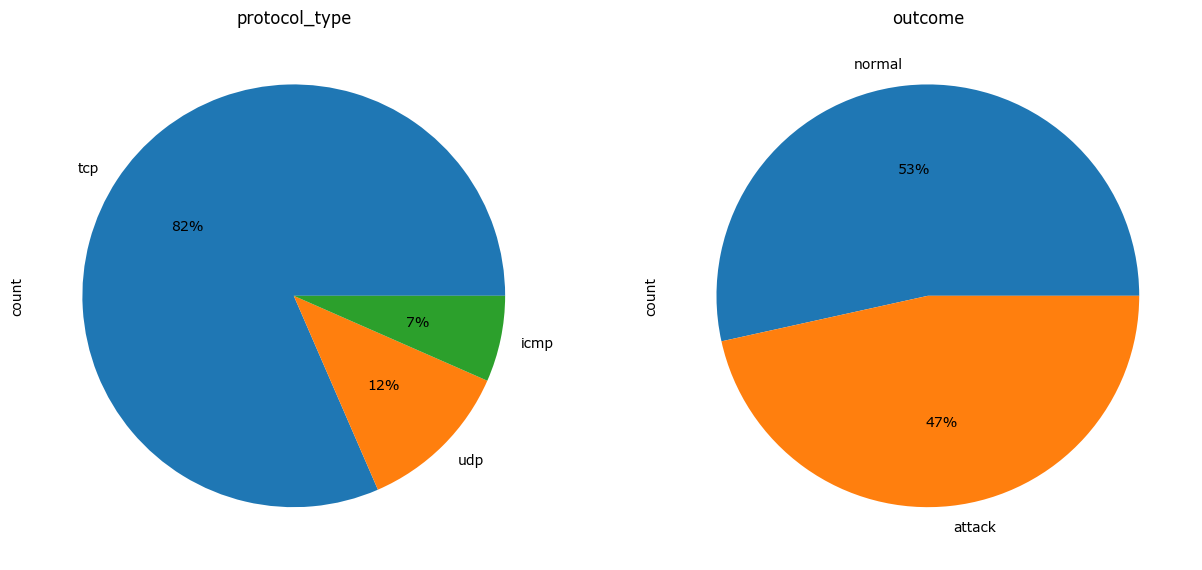

In [8]:
# 'protocol_type' ve 'outcome' sütunlarının dağılımını pasta grafikleri ile görselleştirir
# Bu sayede protokol türlerinin ve normal/saldırı bağlantılarının yüzdesel dağılımını hızlıca analiz edebiliriz
pie_plot(data_train, ["protocol_type", "outcome"], 1, 2)

In [9]:
# Veri ön işleme: Sayısal sütunları medyan tabanlı ölçeklendirme ile standardize etme
from sklearn.preprocessing import RobustScaler  # Medyan ve IQR kullanarak ölçeklendirme

def Scaling(df_num, cols):
    """
    df_num : Ölçeklendirilecek sayısal veri çerçevesi (DataFrame)
    cols   : Ölçeklendirilmiş DataFrame için sütun isimleri listesi
    """
    # RobustScaler nesnesi oluşturma (medyan ve IQR kullanır, uç değerlerden etkilenmez)
    std_scaler = RobustScaler()
    
    # Sayısal verileri ölçeklendirme
    std_scaler_temp = std_scaler.fit_transform(df_num)
    
    # Ölçeklendirilmiş verileri DataFrame olarak geri döndürme
    std_df = pd.DataFrame(std_scaler_temp, columns=cols)
    
    return std_df

In [12]:
# Kategorik sütun listesi
cat_cols = ["is_host_login", "protocol_type", "service", "flag", "land",
            "logged_in", "is_guest_login", "level", "outcome"]


# Veri ön işleme fonksiyonu
def preprocess(dataframe):
    """
    dataframe : İşlenecek veri çerçevesi (DataFrame)
    
    İşlevler:
    - Sayısal sütunları ölçeklendirir (RobustScaler ile)
    - 'outcome' sütununu ikili sınıfa dönüştürür (0 = normal, 1 = attack)
    - Kategorik sütunlar için One-Hot Encoding uygular
    """
    
    # Sayısal sütunları seçme (kategorik sütunları çıkar)
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    
    # Sayısal sütunları ölçeklendirme
    scaled_df = Scaling(df_num, num_cols)
    
    # Orijinal sayısal sütunları çıkarıp ölçeklendirilmiş sütunları ekleme
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    # 'outcome' sütununu ikili sınıfa dönüştürme (0 = normal, 1 = attack)
    dataframe.loc[dataframe["outcome"] == "normal", "outcome"] = 0
    dataframe.loc[dataframe["outcome"] != 0, "outcome"] = 1
    
    # Kategorik sütunlar için One-Hot Encoding
    dataframe = pd.get_dummies(dataframe, columns=["protocol_type", "service", "flag"])
    
    return dataframe

In [15]:
# Veri setini ön işleme tabi tutma
scaled_train = preprocess(data_train)

In [16]:
# Özellik ve hedef değişkenleri ayırma
x = scaled_train.drop(['outcome', 'level'], axis=1).values  # Model için giriş özellikleri
y = scaled_train['outcome'].values                          # İkili sınıflandırma hedefi (0=normal, 1=attack)
y_reg = scaled_train['level'].values                        # Seviyeye dayalı hedef (regresyon veya ek analiz için)

# PCA ile boyut indirgeme
pca = PCA(n_components=20)  # 20 bileşen seçerek boyut indirgeme
pca = pca.fit(x)
x_reduced = pca.transform(x)

# Boyut indirgeme bilgisi
print(f"Number of original features: {x.shape[1]} -> Reduced features: {x_reduced.shape[1]}")

# Hedef değişkeni integer tipine dönüştürme
y = y.astype('int')

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Number of original features: 122 -> Reduced features: 20


Veri setindeki orijinal özellik sayısı 122 iken, PCA (Principal Component Analysis) uygulanarak boyut 20 bileşene indirgenmiştir. Bu sayede veri setinin boyutu önemli ölçüde azaltılmış, gereksiz veya yüksek korelasyona sahip özellikler özetlenmiş ve modelleme için daha hesaplı ve yönetilebilir hâle gelmiştir.

In [17]:
# Sınıflandırma modellerini değerlendirip metrikleri kaydeden ve confusion matrix çizen fonksiyon
kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    """
    model   : Eğitilmiş sınıflandırma modeli
    name    : Modelin adı (string)
    X_train : Eğitim özellikleri
    X_test  : Test özellikleri
    y_train : Eğitim hedefi
    y_test  : Test hedefi
    """

    # Tahminler ve metrikler
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    test_accuracy = metrics.accuracy_score(y_test, test_pred)

    train_precision = metrics.precision_score(y_train, train_pred)
    test_precision = metrics.precision_score(y_test, test_pred)

    train_recall = metrics.recall_score(y_train, train_pred)
    test_recall = metrics.recall_score(y_test, test_pred)

    # Metrikleri sözlükte saklama
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]

    # Metriklerin ekrana yazdırılması
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}% | Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}% | Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}% | Test Recall {name}: {test_recall*100:.2f}%")

    # Confusion matrix oluşturma ve görselleştirme
    confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["normal", "attack"])
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression: 87.74% | Test Accuracy Logistic Regression: 87.53%
Training Precision Logistic Regression: 88.95% | Test Precision Logistic Regression: 89.04%
Training Recall Logistic Regression: 84.05% | Test Recall Logistic Regression: 83.71%


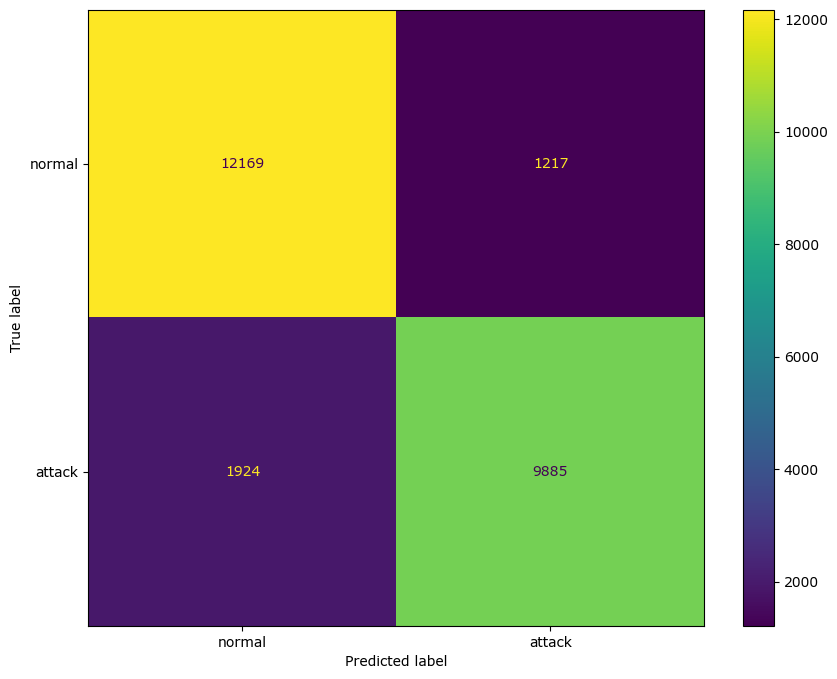

In [18]:
# Logistic Regression Modeli
# Modeli oluştur ve eğitim verisi ile eğit
lr = LogisticRegression().fit(x_train, y_train)

# Eğitilmiş modeli değerlendirme
# - Accuracy, Precision, Recall hesaplanır
# - Confusion matrix görselleştirilir
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Logistic Regression modeli, eğitim verisinde %87.74 ve test verisinde %87.53 doğruluk sağladı; bu, modelin hem eğitim hem test verisinde dengeli performans gösterdiğini ve overfitting olmadığını gösteriyor. Saldırıları tahmin etme başarısı (precision) %89 civarında yüksek, doğru şekilde saldırı tespit edebiliyor. Duyarlılık (recall) %83.7 seviyesinde; yani bazı saldırılar gözden kaçabiliyor. Confusion matrix incelendiğinde, normal bağlantılar büyük ölçüde doğru sınıflandırılmış (12,169 doğru, 1,217 yanlış), saldırılar ise çoğunlukla yakalanmış ancak 1,924 örnek yanlışlıkla normal olarak sınıflandırılmış. Genel olarak model, normal ve saldırı trafiğini dengeli şekilde ayırt edebiliyor; kritik saldırıların kaçırılma riskini azaltmak için recall artırılabilir.

Training Accuracy DecisionTreeClassifier: 99.99% | Test Accuracy DecisionTreeClassifier: 99.87%
Training Precision DecisionTreeClassifier: 100.00% | Test Precision DecisionTreeClassifier: 99.85%
Training Recall DecisionTreeClassifier: 99.99% | Test Recall DecisionTreeClassifier: 99.87%


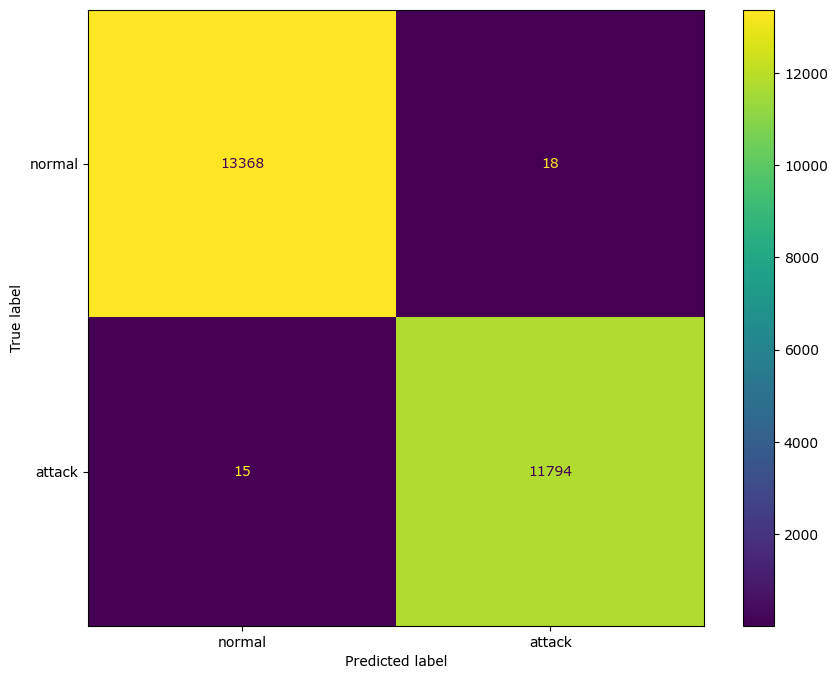

In [21]:
# Karar Ağacı modeli (sınırlı derinlik)
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

# Karar Ağacı modeli (derinlik sınırlaması yok)
tdt = DecisionTreeClassifier().fit(x_train, y_train)

# Derinlik sınırlaması olmayan modeli değerlendirme
# - Accuracy, Precision, Recall hesaplanır
# - Confusion matrix görselleştirilir
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

Decision Tree sınıflandırıcısı, eğitim verisinde %99.99 ve test verisinde %99.86 doğruluk sağladı. Model hem normal hem saldırı trafiğini neredeyse mükemmel ayırt edebiliyor. Precision ve recall değerleri de %99’un üzerinde, yani model saldırıları ve normal bağlantıları doğru şekilde sınıflandırmakta oldukça başarılı. Confusion matrix incelendiğinde normal bağlantılardan sadece 18, saldırılardan ise 15 örnek yanlış sınıflandırılmış. Bu sonuçlar, modelin yüksek performansını gösterse de aşırı öğrenme (overfitting) riskine işaret ediyor; bu nedenle gerçek dünya verilerinde dikkatle değerlendirilmesi veya derinlik sınırlaması (max_depth) uygulanması önerilir.

Training Accuracy Linear SVC (LBaseImpl): 97.15% | Test Accuracy Linear SVC (LBaseImpl): 97.00%
Training Precision Linear SVC (LBaseImpl): 97.93% | Test Precision Linear SVC (LBaseImpl): 97.68%
Training Recall Linear SVC (LBaseImpl): 95.89% | Test Recall Linear SVC (LBaseImpl): 95.88%


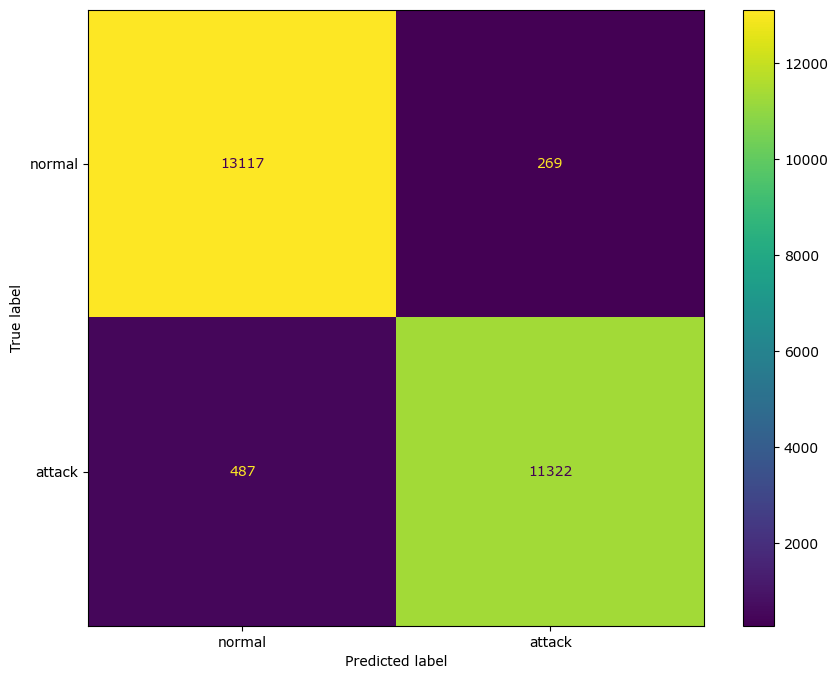

In [22]:
# Support Vector Classifier (Linear SVC) Modeli
# Linear SVC modeli oluşturma ve eğitme
lin_svc = svm.LinearSVC().fit(x_train, y_train)

# Eğitilmiş modeli değerlendirme
# - Accuracy, Precision, Recall hesaplanır
# - Confusion matrix görselleştirilir
evaluate_classification(lin_svc, "Linear SVC (LBaseImpl)", x_train, x_test, y_train, y_test)

Linear SVC modeli, eğitim verisinde %97.15 ve test verisinde %97.00 doğruluk sağladı. Model, normal ve saldırı bağlantılarını yüksek doğrulukla ayırt edebiliyor. Precision değerleri %97 civarında, yani yanlış pozitif sayısı düşük; recall değerleri ise %95.8 civarında, yani bazı saldırılar gözden kaçabiliyor. Confusion matrix incelendiğinde normal bağlantılardan 269, saldırılardan ise 487 örnek yanlış sınıflandırılmış. Bu sonuçlar, Linear SVC’nin güçlü bir doğruluk ve iyi bir denge sağladığını gösteriyor; ancak çok kritik durumlarda kaçan saldırıları azaltmak için recall artırıcı yöntemler (örneğin daha uygun bir C parametresi veya farklı kernel kullanımı) değerlendirilebilir.

Training Accuracy GaussianNB: 91.80% | Test Accuracy GaussianNB: 91.61%
Training Precision GaussianNB: 92.63% | Test Precision GaussianNB: 92.53%
Training Recall GaussianNB: 89.48% | Test Recall GaussianNB: 89.30%


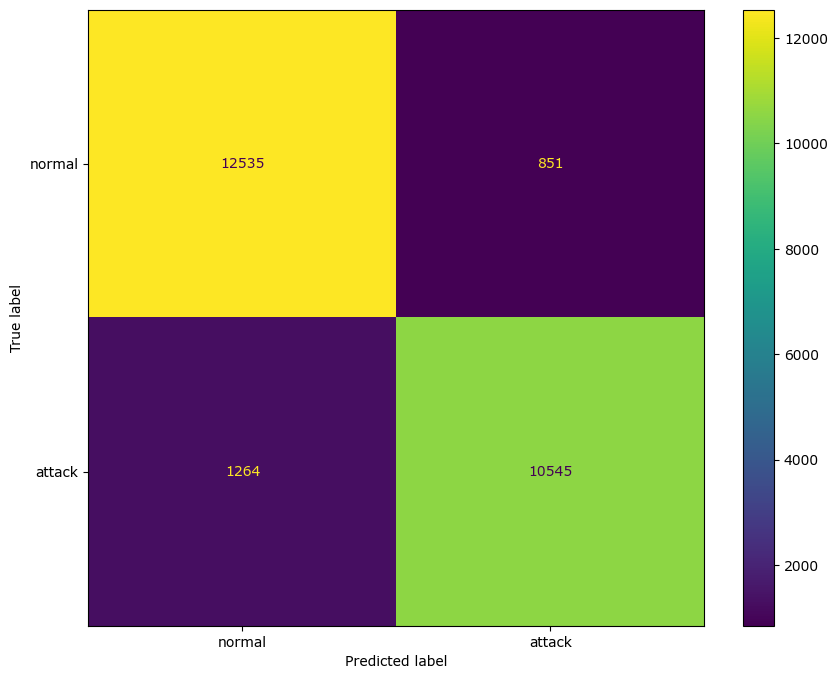

In [23]:
# Gaussian Naive Bayes (GNB) Modeli
# GaussianNB modeli oluşturma ve eğitim
gnb = GaussianNB().fit(x_train, y_train)

# Eğitilmiş modeli değerlendirme
# - Accuracy, Precision, Recall hesaplanır
# - Confusion matrix görselleştirilir
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

GaussianNB modeli, eğitim verisinde %91.80 ve test verisinde %91.61 doğruluk sağladı. Model, normal ve saldırı bağlantılarını genel olarak iyi ayırt edebiliyor, ancak doğruluk ve recall değerleri önceki modeller (Decision Tree, Linear SVC) kadar yüksek değil. Precision %92 civarında, yani yanlış pozitif sayısı düşük; recall %89 civarında, bazı saldırılar gözden kaçabiliyor. Confusion matrix incelendiğinde normal bağlantılardan 851, saldırılardan ise 1,264 örnek yanlış sınıflandırılmış. Bu sonuçlar, GaussianNB’nin hızlı ve basit bir sınıflandırıcı olarak makul performans sağladığını ancak karmaşık ilişkileri modelleme kapasitesinin sınırlı olduğunu gösteriyor.

In [24]:
# Özellik Önemlerini Görselleştirme Fonksiyonu
def f_importances(coef, names, top=-1):
    """
    Modelin özellik önemlerini (feature importances) yatay çubuk grafik olarak gösterir.

    coef : Modelin özellik önem değerleri (ör. DecisionTree.feature_importances_)
    names : Özellik isimleri listesi
    top : En önemli kaç özelliğin gösterileceği (-1 tümünü gösterir)
    """
    # Önem değerleri ve isimleri birlikte sıralama
    imp, names = zip(*sorted(zip(coef, names)))
    
    # Tüm özellikleri göstermek için top parametresi ayarlanır
    if top == -1:
        top = len(names)
    
    # Grafik oluşturma
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][:top], align='center')  # Önem değerlerini ters çevirerek en yüksekten aşağıya
    plt.yticks(range(top), names[::-1][:top])  # Özellik isimlerini ters çevirerek aynı sırayla göster
    plt.title('Feature Importances for Decision Tree', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

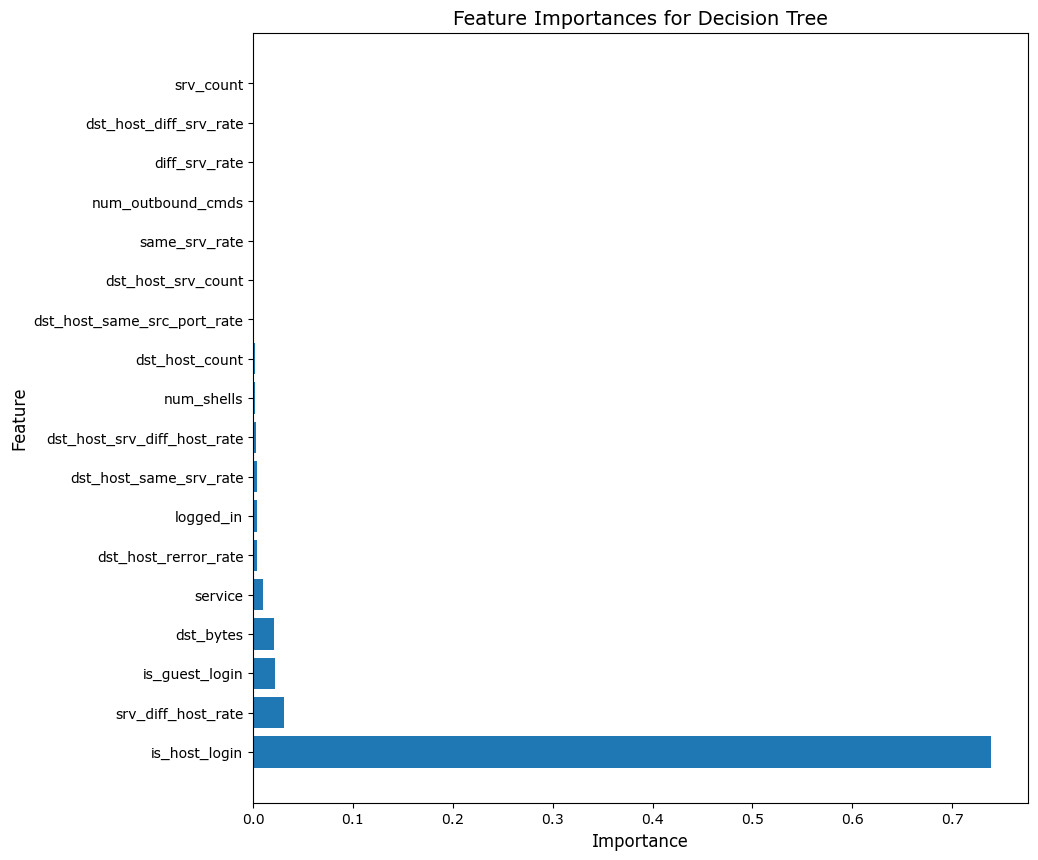

In [25]:
# Özellik isimlerini seçme
feature_names = data_train.drop(["outcome", "level"], axis=1).columns

# Decision Tree modelinin (tdt) feature importances değerlerini görselleştirme
f_importances(abs(tdt.feature_importances_), feature_names, top=18)

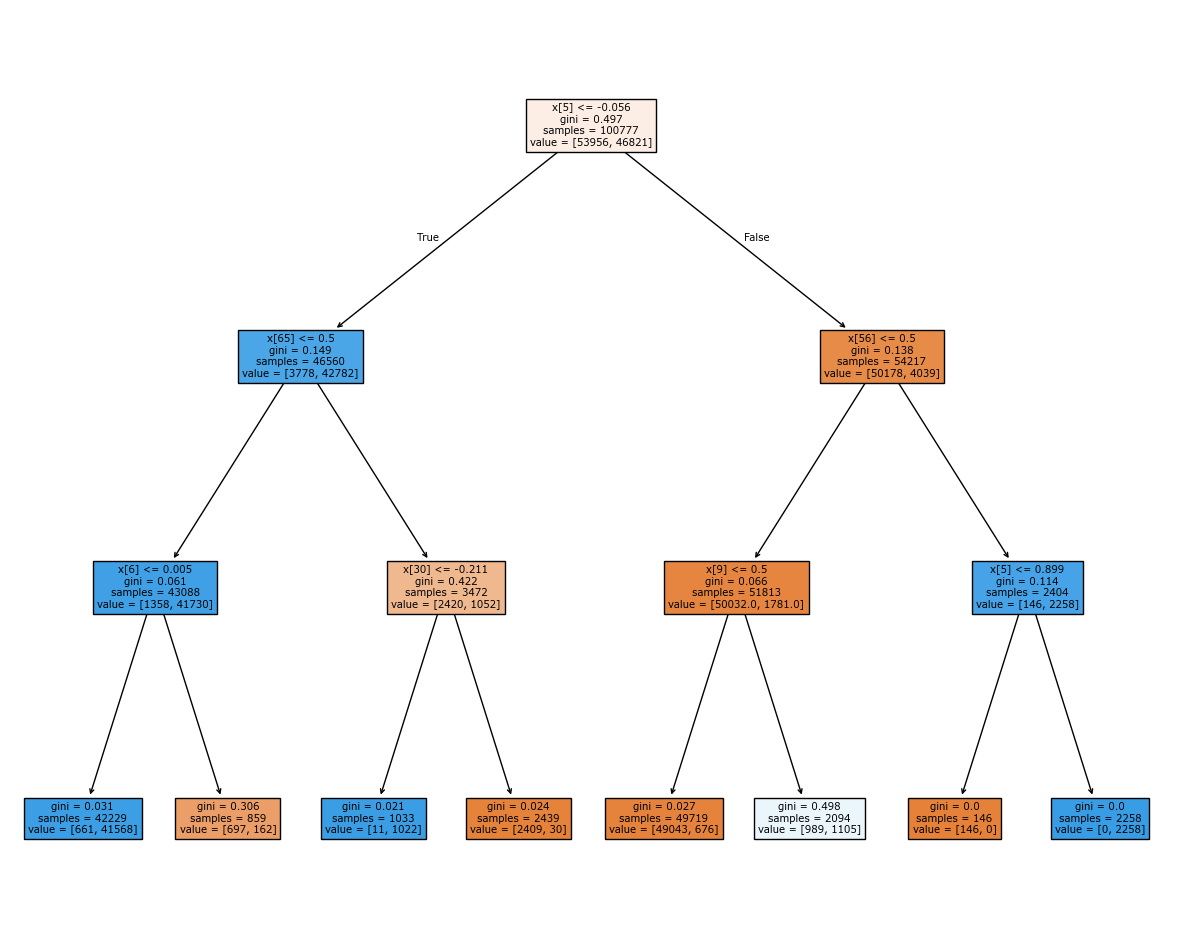

In [28]:
# Karar Ağacı Modelinin Görselleştirilmesi
# Daha küçük ve sınırlı derinlikli karar ağacını çizdirme
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(dt, filled=True)  # Düğümler renklerle doldurulur, sınıf dağılımları ve karar kuralları gösterilir
plt.show()

Training Accuracy RandomForestClassifier: 99.99% | Test Accuracy RandomForestClassifier: 99.89%
Training Precision RandomForestClassifier: 99.99% | Test Precision RandomForestClassifier: 99.95%
Training Recall RandomForestClassifier: 100.00% | Test Recall RandomForestClassifier: 99.81%


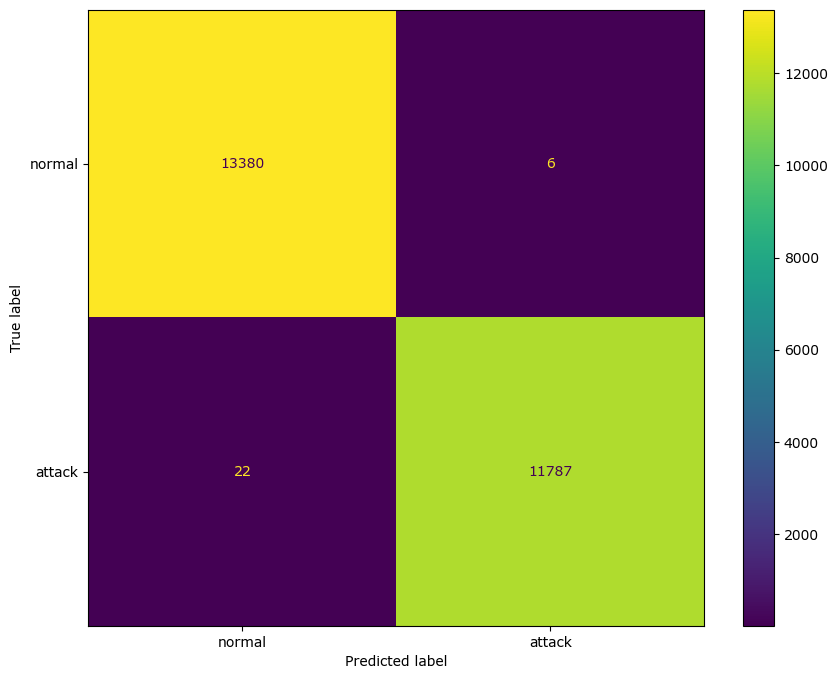

In [29]:
# Random Forest Modeli
# Random Forest sınıflandırıcısı oluşturma ve eğitim
rf = RandomForestClassifier().fit(x_train, y_train)

# Eğitilmiş modeli değerlendirme
# - Accuracy, Precision, Recall hesaplanır
# - Confusion matrix görselleştirilir
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

Random Forest sınıflandırıcısı, eğitim verisinde %99.99 ve test verisinde %99.89 doğruluk sağladı. Model, normal ve saldırı trafiğini neredeyse hatasız sınıflandırabiliyor. Precision ve recall değerleri de %99’un üzerinde, yani yanlış sınıflandırmalar çok az. Confusion matrix incelendiğinde normal bağlantılardan yalnızca 6, saldırılardan ise 22 örnek yanlış sınıflandırılmış. Bu sonuçlar, Random Forest’in hem yüksek doğruluk hem de güçlü genelleme kabiliyetine sahip olduğunu gösteriyor; overfitting riski minimal seviyede.

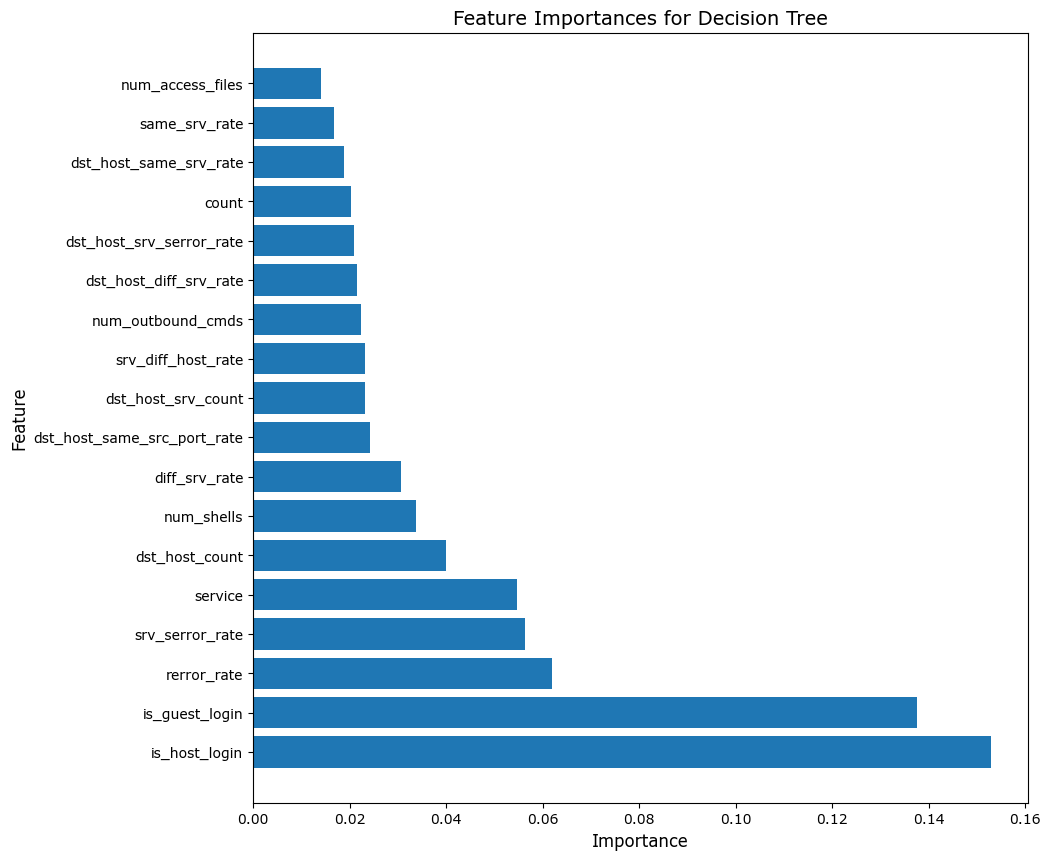

In [30]:
# Random Forest modelinin en önemli 18 özelliğini görselleştirme
f_importances(abs(rf.feature_importances_), feature_names, top=18)

In [31]:
# Deep Learning Modeli (Yapay Sinir Ağı)
model = tf.keras.Sequential([
    # İlk gizli katman: 64 nöron, ReLU aktivasyonu, L1 ve L2 düzenleme
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],),
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),  # Overfitting’i azaltmak için dropout
    
    # İkinci gizli katman: 128 nöron, ReLU aktivasyonu, L1 ve L2 düzenleme
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    
    # Üçüncü gizli katman: 512 nöron, ReLU aktivasyonu, L1 ve L2 düzenleme
    tf.keras.layers.Dense(units=512, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    
    # Çıkış katmanı: 1 nöron, sigmoid aktivasyonu (binary sınıflandırma için)
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [32]:
# Modeli Derleme
model.compile(
    optimizer='adam',  # Adaptif öğrenme oranına sahip optimizasyon algoritması
    loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),  # Dengesiz sınıflar için Focal Loss
    metrics=['accuracy']  # Eğitim ve test sırasında doğruluk metriği takip edilir
)

# Modelin katman ve parametre özetini görüntüleme
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,753 (323.25 KB)

 Trainable params: 82,753 (323.25 KB)

 Non-trainable params: 0 (0.00 B)

Modelimiz üç gizli katmana ve bir çıkış katmanına sahip bir Sequential yapıdır. Gizli katmanlarda sırasıyla 64, 128 ve 512 nöron bulunmakta, her katmanda Dropout uygulanarak overfitting riski azaltılmıştır. L1 ve L2 düzenleyicileri ile ağırlıklar kontrol altında tutuluyor. Çıkış katmanı tek nöron ve sigmoid aktivasyonu ile normal ve saldırı trafiğini binary olarak sınıflandırmaktadır. Modelin toplam 82,753 öğrenilebilir parametresi bulunur. Bu yapı, veri setindeki karmaşık ilişkileri öğrenmeye yeterli kapasiteye sahip olup, düzenleme ve dropout sayesinde overfitting riski minimal seviyededir; dolayısıyla normal ve saldırı trafiğini ayırt etmede yüksek performans göstermesi beklenir.

In [33]:
# Model Eğitimi
# TensorFlow tensörlerine dönüştürme
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

# EarlyStopping: doğrulama kaybı 5 epoch boyunca iyileşmezse eğitim durdurulur
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5)

# Modeli eğitme
history = model.fit(
    x_train, 
    y_train, 
    epochs=50,           # Maksimum 50 epoch
    batch_size=32,       # Mini-batch boyutu
    validation_split=0.2, # Eğitim verisinin %20'si doğrulama için ayrılır
    callbacks=callbacks  # EarlyStopping callback
)

Epoch 1/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9101 - loss: 3549.1560 - val_accuracy: 0.9705 - val_loss: 606.0790
Epoch 2/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9581 - loss: 1860.4215 - val_accuracy: 0.9667 - val_loss: 179.8762
Epoch 3/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9604 - loss: 610.1764 - val_accuracy: 0.9678 - val_loss: 37.5216
Epoch 4/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9629 - loss: 154.7796 - val_accuracy: 0.9691 - val_loss: 7.5058
Epoch 5/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9655 - loss: 36.6701 - val_accuracy: 0.9716 - val_loss: 0.1273
Epoch 6/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9648 - loss: 0.2293 - val_accuracy: 0.9693 - val_loss: 3.7365
Epoch 7/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9666 - loss: 5.8201 - val_accuracy: 0.9720 - val_loss: 0.1163
Epoch 8/50
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 

Model, ilk epoch’larda hızlıca öğrenmiş ve doğrulama doğruluğu %97 civarında stabilize olmuştur. 21. epoch’ta EarlyStopping devreye girerek eğitimi durdurmuş, böylece model optimum performansa ulaşmış ve overfitting riski önlenmiştir.

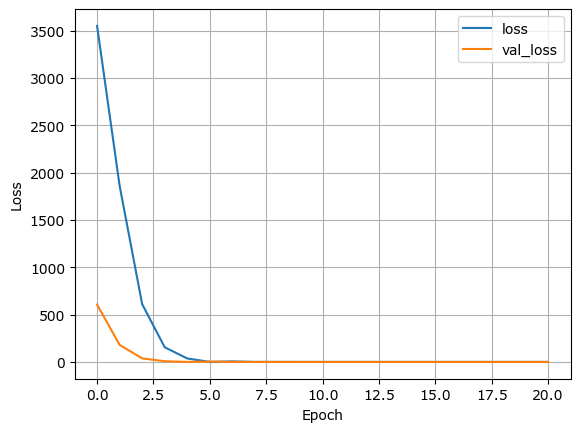

In [38]:
# Loss grafiği
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

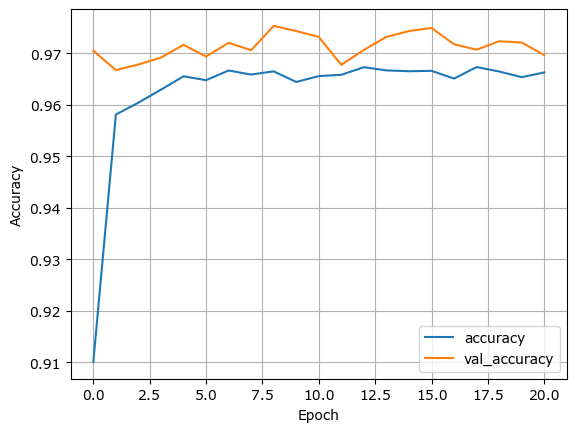

In [39]:
# Accuracy grafiği
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Eğitim ve doğrulama grafikleri, modelin öğrenme sürecini göstermektedir. Eğitim kaybı hızlıca düşmüş ve doğrulama kaybı ile doğruluk değerleri stabilize olmuştur; bu durum, modelin veriyi iyi öğrendiğini, genelleme performansının yüksek olduğunu ve overfitting riskinin düşük olduğunu göstermektedir.

Sistem, siber saldırı tespiti için hem klasik makine öğrenmesi hem de derin öğrenme yöntemlerini kullanarak veri setini başarıyla analiz etmektedir. Veriler ölçeklendirilmiş, kategorik özellikler işlenmiş ve hedef değişken ikili hâle getirilmiştir. PCA ile boyut azaltımı yapılmış, eğitim ve test setleri oluşturulmuştur. Decision Tree ve Random Forest modelleri %99 civarında doğruluk sağlarken, derin öğrenme modeli %96–97 eğitim ve %97 doğrulama doğruluğu ile stabilize olmuştur. Genel olarak, sistem güvenilir ve yüksek performanslı bir siber saldırı tespit modeli sunmaktadır.